In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
import pickle
with open('C:/Users/thale/Python/Avaliação dos algoritmos/credit.pkl','rb') as f:
    x_credit_treinamento,y_credit_treinamento,x_credit_teste,y_credit_teste=pickle.load(f)

In [3]:
x_credit_treinamento.shape,y_credit_treinamento.shape

((1500, 3), (1500,))

In [4]:
x_credit_teste.shape,y_credit_teste.shape

((500, 3), (500,))

In [5]:
import numpy as np

x_credit=np.concatenate((x_credit_treinamento,x_credit_teste), axis=0)
x_credit.shape

(2000, 3)

In [6]:
x_credit

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [7]:
y_credit=np.concatenate((y_credit_treinamento,y_credit_teste) , axis=0)
y_credit.shape

(2000,)

In [8]:
y_credit

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

# **Arvore de decisão melhores parametros**

In [9]:
parametros={'criterion':['gini','entropy'],'splitter':['best','random'],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]}

In [10]:
grid_search=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parametros)
grid_search.fit(x_credit,y_credit)
melhores_paramentros=grid_search.best_params_
melhor_resultado=grid_search.best_score_
print(melhores_paramentros)
print(melhor_resultado)


{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


# **Random forest**

In [11]:
parametros = {'criterion':['gini','entropy'],'n_estimators':[10,40,100,150],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]}

In [12]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_paramentros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_paramentros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
0.9875


# **KNN**  **O k mais proximo**

In [16]:
parametros={'n_neighbors':[3,5,10,20], 'p':[1,2]}

In [17]:
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_paramentros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_paramentros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


# **REGRESSÃO LOGISTICA**

In [18]:
parametros={'tol':[0.0001,0.00001,0.000001],'C':[1.0,1.5,2.0],'solver':['lbfgs','sag','saga']}

In [19]:
grid_search = GridSearchCV(
    estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_paramentros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_paramentros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


# **SVM**


In [21]:
parametros={'tol':[0.001,0.0001,0.00001],'C':[1.0, 1.5,2.0],'kernel':['rbf','linear','poly','sigmoid']}

In [22]:
grid_search = GridSearchCV(
    estimator=SVC(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_paramentros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_paramentros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


# **REDE NEURAIS**

In [23]:
parametros={'activation':['relu','logistic','tahr'],'solver':['adam','sgd'],'batch_size':[10,56]}

In [24]:
grid_search = GridSearchCV(
    estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_paramentros = grid_search.best_params_
melhor_resultado = grid_search.best_score_


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

In [25]:
print(melhores_paramentros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9964999999999999


# **VALIDADE CRUZADA**

In [26]:
from sklearn.model_selection import cross_val_score,KFold

In [27]:
resultados_arvore=[]
resultados_random_fores=[]
resultados_knn=[]
resultados_logist=[]
resultados_svm=[]
resultados_rede_neurais=[]
for i in range(30):
     print(i)
     kfold=KFold(n_splits=10,shuffle=True,random_state=i)

     arvore=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=5,splitter='best')
     score=cross_val_score(arvore,x_credit,y_credit,cv=KFold())
    #  print(score)
    #  print(score.mean())
     resultados_arvore.append(score.mean())

     random_forest=RandomForestClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=5,n_estimators=10)
     scores=cross_val_score(random_forest,x_credit,y_credit,cv=kfold)
     resultados_random_fores.append(scores.mean())

     knn=KNeighborsClassifier()
     scores=cross_val_score(knn,x_credit,y_credit,cv=kfold)
     resultados_knn.append(scores.mean())

     logistic=LogisticRegression(C=1.0,solver='lbfgs',tol=0.0001)
     scores=cross_val_score(logistic,x_credit,y_credit,cv=kfold)
     resultados_logist.append(scores.mean())

     svm=SVC(kernel='rbf',C=2.0)
     scores=cross_val_score(svm,x_credit,y_credit,cv=kfold)
     resultados_svm.append(scores.mean())

     rede_neural=MLPClassifier(activation='relu',batch_size=56,solver='adam')
     scores=cross_val_score(rede_neural,x_credit,y_credit,cv=kfold)
     resultados_rede_neurais.append(scores.mean())

0


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

1


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

2


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

3


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

4


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

5


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

6


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

7


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

8


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

9


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

10


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

11


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

12


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

13


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

14


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

15


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

16


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

17


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

18


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

19


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

20


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

21


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

22


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

23


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

24


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

25


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

26


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

27


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

28


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

29


c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thale\Python\env\Lib\site-packages\sklearn\neural_network\_

In [28]:
resultados_rede_neurais

[0.9970000000000001,
 0.998,
 0.9974999999999999,
 0.9960000000000001,
 0.9974999999999999,
 0.9970000000000001,
 0.9964999999999999,
 0.9964999999999999,
 0.9959999999999999,
 0.9975000000000002,
 0.9964999999999999,
 0.9969999999999999,
 0.9964999999999999,
 0.9974999999999999,
 0.9970000000000001,
 0.9964999999999999,
 0.9964999999999999,
 0.9975000000000002,
 0.998,
 0.9974999999999999,
 0.9974999999999999,
 0.998,
 0.9974999999999999,
 0.9969999999999999,
 0.9970000000000001,
 0.9964999999999999,
 0.9970000000000001,
 0.9970000000000001,
 0.9964999999999999,
 0.9970000000000001]

In [29]:
import pandas as pd


resultados=pd.DataFrame({'Arvore':resultados_arvore,'random forest':resultados_random_fores,'knn':resultados_knn,'regressao logistica':resultados_logist,'svm':resultados_svm,'rede neurais':resultados_rede_neurais})

resultados

,Arvore,random forest,knn,regressao logistica,svm,rede neurais
0,0.9830,0.9805,0.9815,0.9475,0.9845,0.9970
1,0.9845,0.9835,0.9800,0.9465,0.9840,0.9980
2,0.9845,0.9825,0.9795,0.9470,0.9865,0.9975
3,0.9845,0.9845,0.9780,0.9460,0.9850,0.9960
4,0.9845,0.9845,0.9820,0.9465,0.9850,0.9975
5,0.9845,0.9830,0.9780,0.9465,0.9845,0.9970
6,0.9830,0.9900,0.9805,0.9470,0.9860,0.9965
7,0.9845,0.9870,0.9800,0.9480,0.9850,0.9965
8,0.9830,0.9850,0.9795,0.9465,0.9840,0.9960
9,0.9845,0.9815,0.9820,0.9465,0.9845,0.9975


In [30]:
resultados.describe()

,Arvore,random forest,knn,regressao logistica,svm,rede neurais
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.983650,0.984067,0.980050,0.946950,0.985083,0.997033
std,0.000756,0.002231,0.001533,0.000687,0.001280,0.000556
min,0.983000,0.980000,0.977000,0.945500,0.982000,0.996000
25%,0.983000,0.982625,0.979000,0.946500,0.984125,0.996500
50%,0.983000,0.984250,0.980000,0.947000,0.985000,0.997000
75%,0.984500,0.985000,0.981000,0.947500,0.986375,0.997500
max,0.984500,0.990000,0.982500,0.948500,0.987500,0.998000


In [31]:
resultados.var()

Arvore                 5.715517e-07
random forest          4.978161e-06
knn                    2.350862e-06
regressao logistica    4.715517e-07
svm                    1.639368e-06
rede neurais           3.091954e-07
dtype: float64

In [32]:
(resultados.std() / resultados.mean())*100

Arvore                 0.076858
random forest          0.226730
knn                    0.156446
regressao logistica    0.072517
svm                    0.129977
rede neurais           0.055771
dtype: float64

# Teste  estatistico


In [33]:
alpha=0.05

In [34]:
from scipy.stats    import shapiro

In [35]:
shapiro(resultados_arvore), shapiro(resultados_random_fores),shapiro(resultados_knn),shapiro(resultados_logist),shapiro(resultados_svm),shapiro(resultados_rede_neurais)

(ShapiroResult(statistic=0.6317534446716309, pvalue=1.82316668428939e-07),
 ShapiroResult(statistic=0.9752983450889587, pvalue=0.6915223002433777),
 ShapiroResult(statistic=0.9584025144577026, pvalue=0.28181397914886475),
 ShapiroResult(statistic=0.9370949268341064, pvalue=0.07598038017749786),
 ShapiroResult(statistic=0.9622980356216431, pvalue=0.354146808385849),
 ShapiroResult(statistic=0.9197553992271423, pvalue=0.026431938633322716))

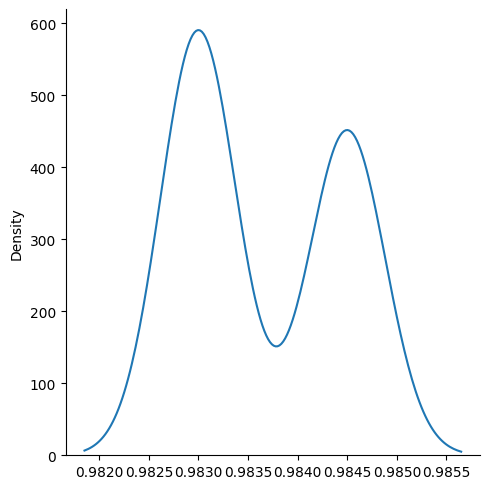

In [36]:
import seaborn as sns
sns.displot(resultados_arvore,kind='kde');

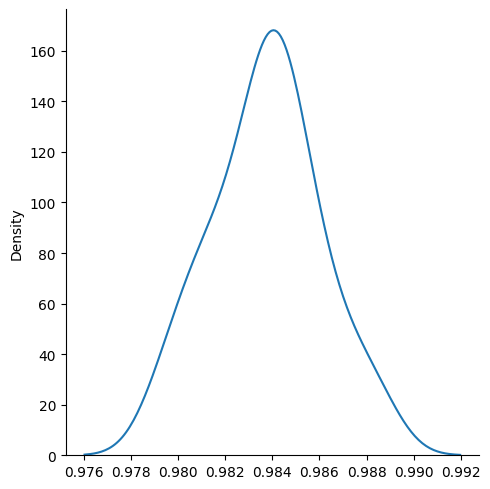

In [53]:
sns.displot(resultados_random_fores,kind='kde');

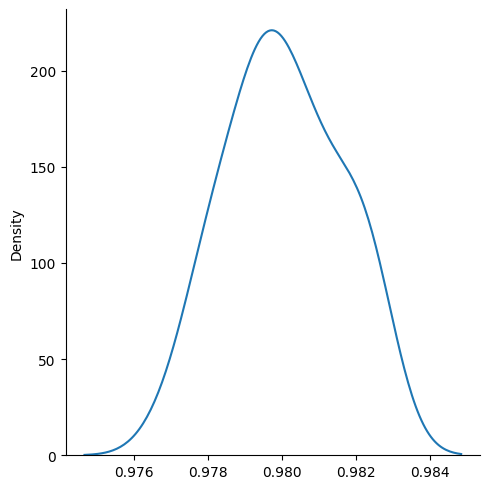

In [54]:
sns.displot(resultados_knn, kind='kde');

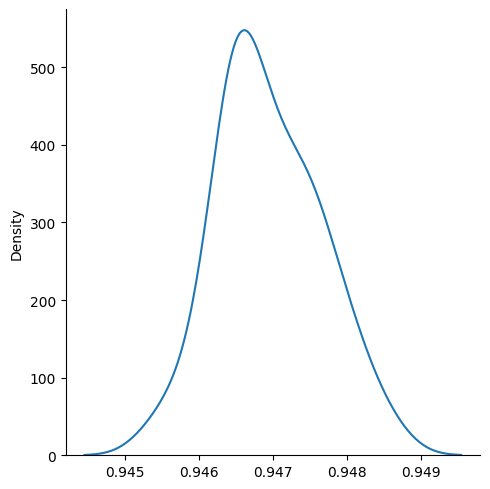

In [55]:
sns.displot(resultados_logist, kind='kde');

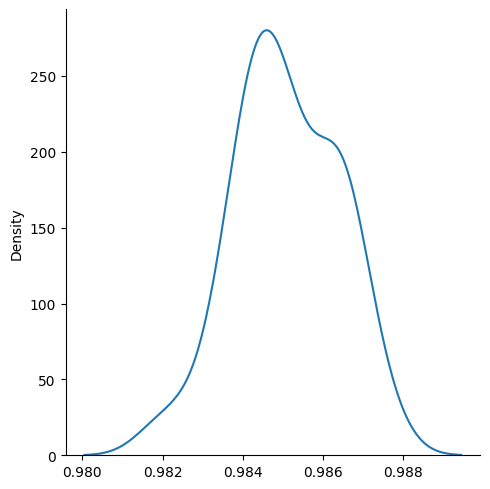

In [56]:
sns.displot(resultados_svm,kind='kde');

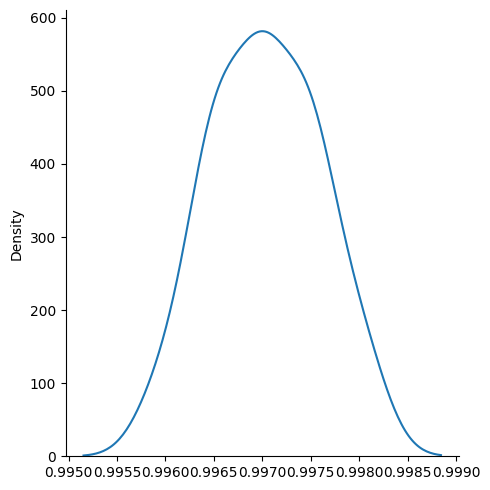

In [37]:
sns.displot(resultados_rede_neurais, kind='kde');

# TESTE DE HIPOTESE COM ANOVA E TUKEY

In [38]:
from scipy.stats import f_oneway

In [39]:
p=f_oneway(resultados_arvore,resultados_random_fores,resultados_knn,resultados_logist,resultados_svm,resultados_rede_neurais)
p

F_onewayResult(statistic=5010.602494709959, pvalue=5.700752926991316e-186)

In [40]:
alpha=0.05
if p <= alpha:
    print('hipotese nula rejeitada,dados difrentes')
else:
    print('hipotese alternativa rejeitada. resultados são iguais')
        

TypeError: '<=' not supported between instances of 'F_onewayResult' and 'float'

In [46]:
resultados_algoritimos={'accuracy':np.concatenate([resultados_arvore,resultados_random_fores,resultados_knn,resultados_knn,resultados_logist,resultados_svm,resultados_rede_neurais]),
'algoritimo':['arvore', 'arvore', 'arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
 'arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
 'arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',


 'random_forest', 'random_forest', 'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
 'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
 'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',


 'knn', 'knn', 'knn','knn','knn','knn','knn','knn','knn','knn',
 'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
 'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',


 'regressao logistica', 'regressao logistica', 'regressao logistica','regressao logistica','regressao logistica','regressao logistica','regressao logistica','regressao logistica','regressao logistica','regressao logistica',
 'regressao logistica','regressao logistica','regressao logistica','regressao logistica','regressao logistica','regressao logistica','regressao logistica','regressao logistica','regressao logistica','regressao logistica', 
 'regressao logistica','regressao logistica','regressao logistica','regressao logistica','regressao logistica','regressao logistica','regressao logistica','regressao logistica','regressao logistica','regressao logistica',


 'svm', 'svm', 'svm','svm','svm','svm','svm','svm','svm','svm',
 'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm', 
 'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',

 'rede_neurais', 'rede_neurais', 'rede_neurais','rede_neurais','rede_neurais','rede_neurais','rede_neurais','rede_neurais','rede_neurais','rede_neurais',
 'rede_neurais','rede_neurais','rede_neurais','rede_neurais','rede_neurais','rede_neurais','rede_neurais','rede_neurais','rede_neurais','rede_neurais', 
 'rede_neurais','rede_neurais','rede_neurais','rede_neurais','rede_neurais','rede_neurais','rede_neurais','rede_neurais','rede_neurais','rede_neurais',]}

In [ ]:

import pandas as pd

resultados_df = pd.DataFrame(resultados_algoritimos)
resultados_df.head(60)

In [ ]:
%pip install statsmodels



In [50]:
from statsmodels.stats.multicomp import MultiComparison

In [51]:
compara_algortimo=MultiComparison(resultados_df['accuracy'],resultados_df['algoritimo'])

NameError: name 'resultados_df' is not defined